In [270]:
import statsmodels.api as sm                                                    # importar a API que contém o conjunto de dados mt cars
import numpy as np                                                              # manipulação de matrizes/vetores
import pandas as pd                                                             # manipulação de datasets
import seaborn as sn                                                            # visualização de dados
import matplotlib                                                               # visualização de dados
import matplotlib.pyplot as plt                                                 # visualização de dados
matplotlib.rcParams['figure.figsize'] = (9.0, 6.0)                              # ajustar tamanho padrão dos gráficos
from sklearn import linear_model                                                # regressão linear
from sklearn.metrics import mean_absolute_error                                 # erro médio absoluto
from statistics import mean                                                     # funcao que calcula media

In [271]:
#importando o mtcars
mtcars = sm.datasets.get_rdataset('mtcars', 'datasets', cache=True).data
mtcars = pd.DataFrame(mtcars)

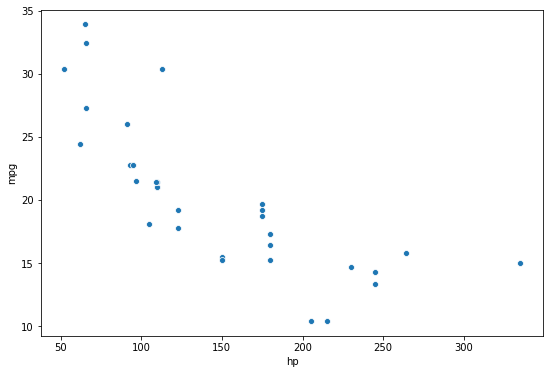

In [272]:
sn.scatterplot(mtcars['hp'], mtcars['mpg'])
plt.show()

Em um primeiro momento, vamos usar apenas a variável "hp" para prever "mpg"; temos então que separá-las em duas variáveis diferentes.

In [273]:
mtcars_X = mtcars['hp']
mtcars_y = mtcars['mpg']

In [274]:
X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(        # Aplicando o método holdout para separar treino e teste. obs: esse método faz uma seleção aleatória,
mtcars_X, mtcars_y, test_size = 0.25)                                           # então não precisamos "embaralhar" os dados                                                                                                      

Antes de instanciar o objeto da regressão e treinar o modelo, precisamos fazer um ajuste. O método `.fit()` só funciona quando a matriz dos valores do conjunto de dados X tem um formato 2D (acesse o link https://www.w3schools.com/python/numpy_creating_arrays.asp p/ mais detalhes). Como só estamos usando *uma* variável como preditora em X, precisamos então converter as variáveis X_train e X_test para esse formato 2D.

In [277]:
#Criando o objeto da regressão linear
regr = linear_model.LinearRegression() 

# Treinar o modelo usando os conjuntos de treino
regr.fit(X_train.values.reshape(-1,1), y_train)                                  # o metodo .reshape() converte as variaveis X para 2D

# Fazer as predições com base no conjunto de teste
y_pred = regr.predict(X_test.values.reshape(-1,1))

Finalmente, vamos calcular os valores do intercepto, coeficiente angular e o erro médio absoluto usando os métodos `.intercept_` e `.coef_` e a função `mean_absolute_error` do scikit-learn.

In [278]:
print(f'Intercepto e coeficiente:')
print(regr.intercept_.round(2))
print(regr.coef_.round(4))
print(f"\nErro médio absoluto: {mean_absolute_error(y_test, y_pred).round(2)}")        


Intercepto e coeficiente:
28.52
[-0.0572]

Erro médio absoluto: 4.52


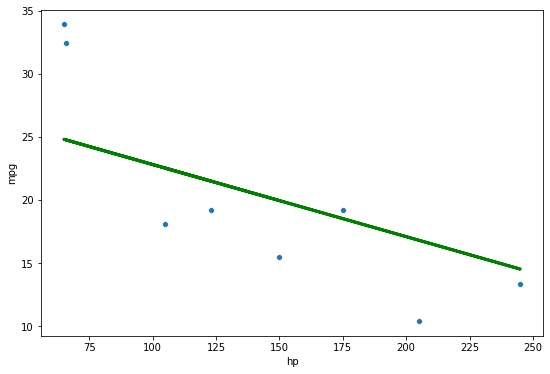

In [279]:
# podemos visualizar a reta da regressão junto com os dados de teste...
sn.scatterplot(X_test,y_test)
plt.plot(X_test, y_pred, color='green', linewidth=3)
plt.show()

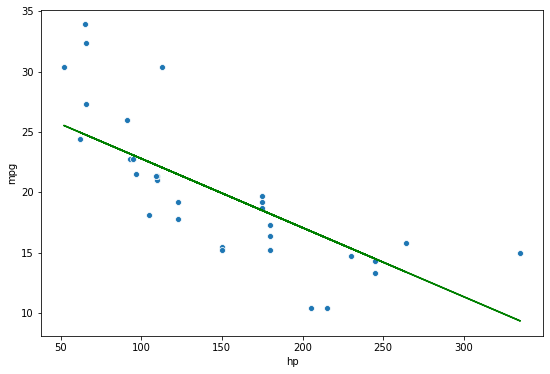

In [280]:
#... e com todos os dados também!
total_y_pred = regr.predict(mtcars_X.values.reshape(-1,1))                      # não esquecer de reformatar os dados X!
sn.scatterplot(mtcars_X, mtcars_y)
plt.plot(mtcars_X, total_y_pred, color='green')
plt.show()

Para fazer o holdout repetido, e adicionar outras variáveis no modelo, podemos fazer uma função:

In [287]:
def reg_linear():

  n = int(input('Insira o número de repetições do holdout: '))
  predita = input('Insira o nome da variavel predita: ')
  preditoras = input('Insira o nome da(s) variavel(is) preditora(s) - Se for mais de uma variável, separar com vírgula e sem espaço:').split(',') 

  X = mtcars.loc[:, preditoras]
  y = mtcars[predita]
  # lista que irá conter o EMA de cada repetição
  lista_ema = []                                                              

  # se for passada só uma variavel preditora, temos que reformatar
  if X.values.ndim == 1:                                                        
      X = X.values.reshape(-1,1)
  else:
      pass

  for i in range(n):
    X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(                                                                     
                                        X, y, test_size = 0.25)
    regr = linear_model.LinearRegression() 
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test) 
    # adicionamos o EMA na lista
    lista_ema.append(mean_absolute_error(y_test, y_pred))

  # finalmente, retorna-se a média de todos n EMAs
  print(f'Média do EMA usando {preditoras} como preditora(s):',mean(lista_ema).round(2))


In [286]:
# teste com uma variável (hp)
reg_linear()

Insira o número de repetições do holdout: 1000
Insira o nome da variavel predita: mpg
Insira o nome da(s) variavel(is) preditora(s) (Se for mais de uma variável, separar com vírgula e sem espaço:hp
Média do EMA usando ['hp'] como preditora(s): 3.22


In [288]:
# teste com duas variáveis (hp + cyl)
reg_linear()

Insira o número de repetições do holdout: 1000
Insira o nome da variavel predita: mpg
Insira o nome da(s) variavel(is) preditora(s) - Se for mais de uma variável, separar com vírgula e sem espaço:hp,cyl
Média do EMA usando ['hp', 'cyl'] como preditora(s): 2.7
